[-0.70710678 -0.57357644 -0.42261826 -0.25881905 -0.08715574  0.08715574
  0.25881905  0.42261826  0.57357644  0.70710678] [-0.70710678 -0.81915204 -0.90630779 -0.96592583 -0.9961947  -0.9961947
 -0.96592583 -0.90630779 -0.81915204 -0.70710678]


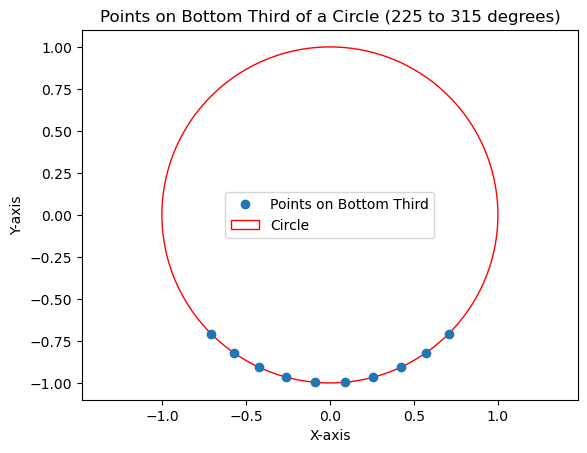

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def points_on_bottom_third_of_circle(radius, num_points):
    theta = np.linspace(np.radians(225), np.radians(315), num_points)
    
    # Parametric equations for a circle
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    
    return x, y

# Example usage
radius = 1.0
num_points = 10
x_points, y_points = points_on_bottom_third_of_circle(radius, num_points)
print(x_points, y_points)

# Plotting the points and the circle
plt.plot(x_points, y_points, 'o', label='Points on Bottom Third')
circle = plt.Circle((0, 0), radius, color='r', fill=False, label='Circle')
plt.gca().add_patch(circle)
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Points on Bottom Third of a Circle (225 to 315 degrees)')
plt.legend()
plt.show()


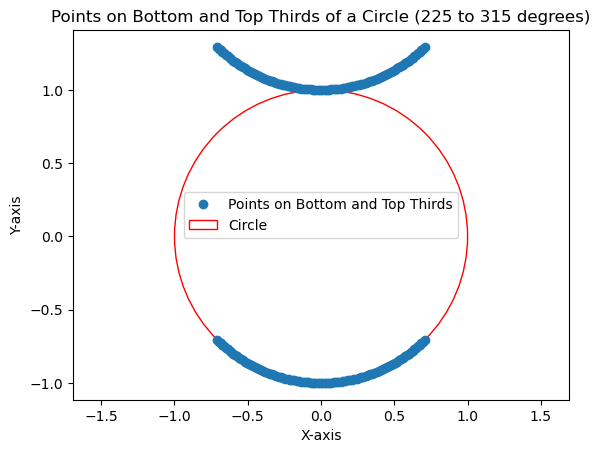

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def points_on_bottom_and_top_third_of_circle(radius, num_points):
    theta = np.linspace(np.radians(225), np.radians(315), num_points)
    
    # Parametric equations for the bottom third of a circle
    x_bottom = radius * np.cos(theta)
    y_bottom = radius * np.sin(theta)
    
    # Shift the top points vertically
    y_top = y_bottom + 2 * radius  # Assuming a vertical shift of 2 * radius, adjust as needed
    x_top = x_bottom
    
    # Combine bottom and top points
    x_combined = np.concatenate([x_bottom, x_top])
    y_combined = np.concatenate([y_bottom, y_top])
    
    return x_combined, y_combined

# Example usage
radius = 1.0
num_points = 100
x_points, y_points = points_on_bottom_and_top_third_of_circle(radius, num_points)

# Plotting the points and the circle
plt.plot(x_points, y_points, 'o', label='Points on Bottom and Top Thirds')
circle = plt.Circle((0, 0), radius, color='r', fill=False, label='Circle')
plt.gca().add_patch(circle)
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Points on Bottom and Top Thirds of a Circle (225 to 315 degrees)')
plt.legend()
plt.show()

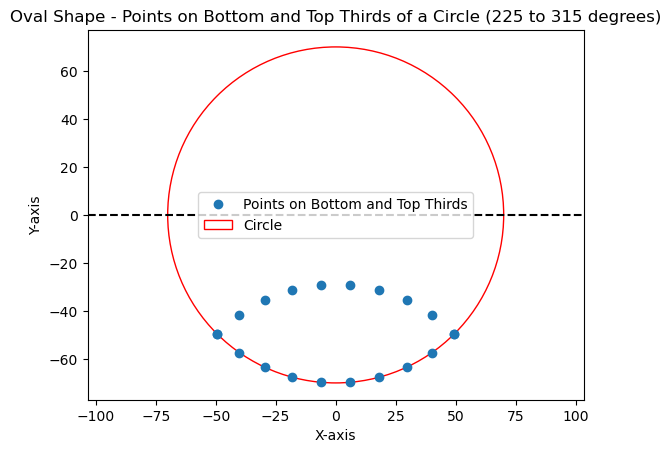

[-49.49747468 -40.15035054 -29.58327832 -18.11733316  -6.10090199
   6.10090199  18.11733316  29.58327832  40.15035054  49.49747468
 -49.49747468 -40.15035054 -29.58327832 -18.11733316  -6.10090199
   6.10090199  18.11733316  29.58327832  40.15035054  49.49747468] [-49.49747468 -57.3406431  -63.44154509 -67.61480784 -69.73362887
 -69.73362887 -67.61480784 -63.44154509 -57.3406431  -49.49747468
 -49.49747468 -41.65430627 -35.55340427 -31.38014153 -29.2613205
 -29.2613205  -31.38014153 -35.55340427 -41.65430627 -49.49747468]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def points_on_bottom_and_top_third_of_circle(radius, num_points):
    theta = np.linspace(np.radians(225), np.radians(315), num_points)
    
    # Parametric equations for the bottom third of a circle
    x_bottom = radius * np.cos(theta)
    y_bottom = radius * np.sin(theta)
    
    # Mirror the bottom points to create the top points
    x_top = x_bottom
    y_top = -y_bottom + (y_bottom[0]*2)
    
    # Combine bottom and top points
    x_combined = np.concatenate([x_bottom, x_top])
    y_combined = np.concatenate([y_bottom, y_top])
    
    return x_combined, y_combined

# Example usage
radius = 70
num_points = 10
x_points, y_points = points_on_bottom_and_top_third_of_circle(radius, num_points)

# Plotting the points and the circle
plt.plot(x_points, y_points, 'o', label='Points on Bottom and Top Thirds')
circle = plt.Circle((0, 0), radius, color='r', fill=False, label='Circle')
plt.gca().add_patch(circle)
plt.axhline(0, color='k', linestyle='--')
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Oval Shape - Points on Bottom and Top Thirds of a Circle (225 to 315 degrees)')
plt.legend()
plt.show()
print(x_points, y_points)

In [4]:
import numpy as np
#InverseKinematics.py

#Calculating the joint angles needed to achieve a certain position of the end effector (foot)
#Given a desired position for the foot, compute the necessary angles for each servo in a leg.

#Calculations derived from https://www.mdpi.com/2076-3417/12/9/4358

def calculate_theta1(Px, Pz, L1, L2, L3):
    # Calculate a and b
    a = (L1 / 2) * L2 - Px * L2 + L2 * L3
    b = Px**2 - 2 * Px * (L1 / 2) - 2 * Px * L3 + Pz**2 + (L1 / 2)**2 + L1 * L3 + L3**2

    # Calculate sθ1 and cθ1
    s_theta1 = ((L1 / 2) - Px + L3) * a / (Pz * b - (L2 / 2) * Pz)
    c_theta1 = a + Pz * np.sqrt(b - L2**2) / b

    # Calculate θ1
    theta1 = np.arctan2(s_theta1, c_theta1)

    return theta1

def calculate_theta2(Px, Pz, L1, L5):
    # Calculate c and d
    c = -4 * Px**2 - 8 * Px * (L1 / 2) - 4 * Pz**2 + L5**2 - 4 * (L1 / 2)**2
    d = Px**2 + 2 * Px * (L1 / 2) + Pz**2 + (L1 / 2)**2
    print(c)
    # Calculate sθ2 and cθ2
    s_theta2 = Pz * (L5 + np.sqrt(d)) / (2 * d)
    c_theta2 = (Px + (L1 / 2)) * (L5 + np.sqrt(c)) / (2 * d)

    # Calculate θ2
    theta2 = np.arctan2(s_theta2, c_theta2)

    return theta2

##Testing the functions
# Define link lengths and foot position (replace with actual values)
L1, L2, L3, L5 = 56, 25, 90, 25 #mm

for Px,Pz in zip(x_points, y_points):
    # Calculate joint angles
    theta1 = calculate_theta1(Px, Pz, L1, L2, L3)
    theta2 = calculate_theta2(Px, Pz, L1, L5)

    # Print the results
    print(f"Theta1: {np.degrees(theta1)} degrees")
    print(f"Theta2: {np.degrees(theta2)} degrees")

-11023.565670994934
Theta1: -0.0063588437807473005 degrees
Theta2: nan degrees
-13117.32147801559
Theta1: -0.00558702522294472 degrees
Theta2: nan degrees
-15484.345655905823
Theta1: -0.005168059551137947 degrees
Theta2: nan degrees
-18052.717372792475
Theta1: -0.004996652685890028 degrees
Theta2: nan degrees
-20744.397953716725
Theta1: -0.005035813435090041 degrees
Theta2: nan degrees
-23477.60204628328
Theta1: -0.005293532422755765 degrees
Theta2: nan degrees
-26169.282627207518
Theta1: -0.005824077067334328 degrees
Theta2: nan degrees
-28737.65434409416
Theta1: -0.006751739490148091 degrees
Theta2: nan degrees
-31104.678521984402
Theta1: -0.00833456503255108 degrees
Theta2: nan degrees
-33198.43432900506
Theta1: -0.01112481224132997 degrees
Theta2: nan degrees
-11023.565670994934
Theta1: -0.0063588437807473005 degrees
Theta2: nan degrees
-6905.848995393377
Theta1: -0.008137569784802541 degrees
Theta2: nan degrees
-4441.205302732013
Theta1: -0.010326833617592384 degrees
Theta2: nan d

/tmp/ipykernel_277/2956040024.py:30: RuntimeWarning: invalid value encountered in sqrt
  c_theta2 = (Px + (L1 / 2)) * (L5 + np.sqrt(c)) / (2 * d)
